In [1]:
import os
import sys
import h5py
import pickle
import numpy as np
import pandas as pd
from operator import itemgetter
import matplotlib.pyplot as plt

from matplotlib.collections import PatchCollection
from descartes import PolygonPatch
from shapely.geometry import shape, LineString

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from modis_utils.misc import cache_data, restore_data

In [3]:
def mse(x, y):
    if isinstance(x, pd.Series) or isinstance(x, pd.DataFrame):
        x = x.values
    if isinstance(y, pd.Series) or isinstance(y, pd.DataFrame):
        y = y.values
    return np.mean((x - y)**2)

def mse_1(x, y):
    a = (x - y)**2
    return np.mean(a, axis=0)

def mse_2(x, y):
    a = (x - y)**2
    b = np.where(a > 30, 0, 1)
    c = a*b
    return np.sum(c)/np.sum(b)

def save_data_pickle(data, path):
    with open(path, 'wb') as f:
        pickle.dump(data, f)

def load_data_pickle(path):
    with open(path, 'rb') as f:
        return pickle.load(f)
    
def convert(data_inference, column_index, df):
    df = df.reshape(df.shape[0], -1)
    max_index = np.max(column_index)
    res = np.zeros((max_index + 1, data_inference.shape[0]))
    for i, col_index in enumerate(column_index):
        res[col_index] = data_inference[:,i]
    unique_value_column_index = np.setdiff1d(np.arange(max_index + 1), column_index)
    for i in unique_value_column_index:
        res[i] = np.unique(df[:,i])
    res = res.T
    return res.reshape(res.shape[0], -1, 2)

In [4]:
data = restore_data(os.path.join('cache', 'boundary_vectors_ALL_1.dat'))
data_train = data[0]
data_test = data[1]
data_train.shape, data_test.shape

((598, 1484, 2), (92, 1484, 2))

In [5]:
1484*2

2968

In [6]:
df_train = load_data_pickle('data/df_train.dat')
df_test = load_data_pickle('data/df_test.dat')
df_train_12 = load_data_pickle('data/df_train_12.dat')
df_test_12 = load_data_pickle('data/df_test_12.dat')

In [7]:
df_train.shape, df_test.shape

((506, 2959), (92, 2959))

In [8]:
df_train_12.shape, df_test_12.shape

((506, 12), (92, 12))

In [9]:
n_tests = len(df_test)
n_tests

92

In [10]:
yhat = restore_data('vsarima_inference.dat')

In [11]:
yhat.shape

(92, 2959)

In [12]:
x_208 = df_train.values[:, 208]

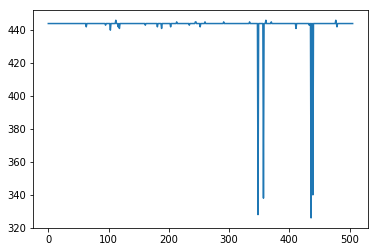

In [13]:
plt.plot(x_208)

In [14]:
from scipy.stats import mode

In [15]:
def find_mode(arr):
     return mode(arr)[0][0]

In [16]:
yhat_2 = yhat.copy()
yhat_2[:, 208] = find_mode(x_208)

In [17]:
mse(yhat_2, df_test.values)

11.585758614117799

In [18]:
ytrue = df_test.values

In [19]:
mse_2(yhat_2, ytrue)

2.487879408710567

In [20]:
res = mse_1(yhat_2, ytrue)
res

array([5.57682476e+00, 0.00000000e+00, 7.28269200e+00, ...,
       4.45898098e+00, 3.82411865e-15, 7.08755399e+00])

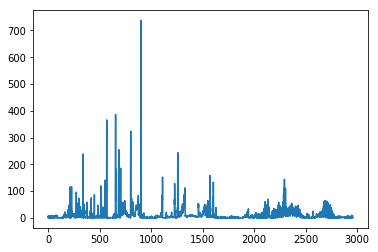

In [21]:
plt.plot(res)

(array([2.195e+03, 3.370e+02, 1.540e+02, 1.030e+02, 6.800e+01, 3.100e+01,
        1.800e+01, 1.000e+01, 5.000e+00, 7.000e+00, 5.000e+00, 4.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.        ,  10.54626178,  21.09252355,  31.63878533,
         42.18504711,  52.73130888,  63.27757066,  73.82383244,
    

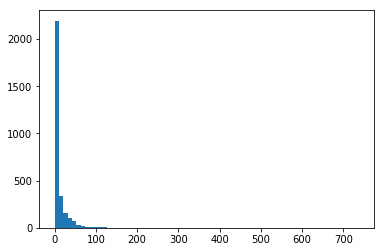

In [22]:
plt.hist(res, bins=70)

In [23]:
yhat_2.shape, 

((92, 2959),)

In [24]:
column_index = df_test.columns.values
column_index

array([   1,    2,    3, ..., 2965, 2966, 2967])

In [25]:
a = data_train.reshape(data_train.shape[0], -1)

In [26]:
a[:,0].shape

(598,)

In [27]:
np.unique(a[:,0])

array([256, 257])

In [28]:
unique_value_column_index = np.setdiff1d(np.arange(2958 + 1), column_index)

In [29]:
unique_value_column_index

array([   0,  673,  679,  685, 1733, 1737, 1761, 1773, 2751])

In [30]:
data_train_full = restore_data('data/data_train_full.dat')

In [31]:
yhat_fill_unique = convert(yhat_2, column_index, data_train_full)

In [32]:
sarima_predict = yhat_fill_unique

In [33]:
yhat_fill_unique.shape

(92, 1484, 2)

In [34]:
mse_2(yhat_fill_unique, data_test)

2.4798451018164958

In [35]:
mse_sarima = []

In [36]:
for i in range(n_tests):
    mse_sarima.append(mse(data_test[i], yhat_fill_unique[i]))

In [37]:
if not os.path.exists('result'):
    os.makedirs('result')

In [38]:
save_data_pickle(mse_sarima, 'result/sarima.dat')

In [39]:
save_data_pickle(yhat_fill_unique, 'result/sarima_inference_fill_unique.dat')

In [40]:
mse_convlstm = load_data_pickle('result/convlstm.dat')

In [41]:
convlstm_predict = load_data_pickle('result/convlstm_predict_1.dat')

In [42]:
def calc_correlation(y, yhat):
    y = y.reshape(y.shape[0], -1)
    yhat = yhat.reshape(yhat.shape[0], -1)
    return np.corrcoef(y, yhat)

In [43]:
groundtruth_sarima_correlation = calc_correlation(data_test, yhat_fill_unique)

In [44]:
groundtruth_sarima_correlation.shape

(184, 184)

In [45]:
from scipy.stats.stats import pearsonr

In [46]:
pearsonr(data_test[0].flatten(), yhat_fill_unique[0].flatten())

(0.9997973599844087, 0.0)

In [47]:
pearsonr(data_test[0].flatten(), convlstm_predict[0].flatten())

(0.9994019170764902, 0.0)

In [48]:
res = np.vstack([mse_convlstm, mse_sarima])

In [49]:
res.shape

(2, 92)

In [50]:
np.savetxt('result/mse.csv', res, delimiter=',')

In [51]:
res1 = res.copy()

In [52]:
res

array([[16.22708895, 10.54447439,  9.15902965,  6.58086253,  8.46698113,
         6.57985175, 10.41778976,  9.60309973,  7.0532345 ,  7.79885445,
        13.87836927,  4.98551213,  2.22203504,  3.18396226,  1.50808625,
         1.11320755,  0.90902965,  1.16644205,  0.55963612,  0.48652291,
         0.24022911,  0.1546496 ,  1.39858491, 12.55525606,  5.60309973,
        11.5916442 , 16.45181941, 15.80121294, 19.84332884, 26.92385445,
        22.44946092, 27.51819407, 36.23045822, 25.49022911, 30.78032345,
        38.0495283 , 18.78605121, 29.20451482, 15.57850404, 17.82614555,
        15.82648248, 17.37432615, 17.25067385, 15.64622642, 15.30997305,
         6.8402965 , 10.52661725, 27.15768194,  9.97877358, 12.31738544,
         7.68126685,  6.7884097 ,  4.42621294,  7.6856469 , 13.96091644,
         3.56873315, 12.15633423,  2.71024259,  3.59838275,  5.19339623,
         2.59467655,  2.50404313,  2.19811321,  1.6597035 ,  1.71327493,
         2.65229111,  2.71192722,  4.41105121,  7.9

In [53]:
def top_res(res, k=10, column_id=0, order='great'):
    res = np.vstack([np.arange(res.shape[1]), res])
    res = res.transpose().tolist()
    if column_id == 0:
        res = sorted(res, key=itemgetter(1,0,2))
    else:
        res = sorted(res, key=itemgetter(2,0,1))
    if order == 'great':
        return np.asarray(res[-k:])
    else:
        return np.asarray(res[:k])

In [54]:
a = top_res(res)
a

array([[32.        , 36.23045822, 29.09794367],
       [35.        , 38.0495283 , 10.94892761],
       [84.        , 39.71563342, 22.24086136],
       [76.        , 39.92857143, 24.73647927],
       [72.        , 41.36893531, 28.17721482],
       [80.        , 41.66307278, 22.19571899],
       [73.        , 43.07311321, 26.92314261],
       [75.        , 44.00774933, 23.59570753],
       [82.        , 49.38409704, 25.37208006],
       [74.        , 93.99393531, 60.44208411]])

In [55]:
b = top_res(res, column_id=1, order='less')
b

array([[18.        ,  0.55963612,  0.5794585 ],
       [16.        ,  0.90902965,  0.73881321],
       [21.        ,  0.1546496 ,  1.10252237],
       [17.        ,  1.16644205,  1.41086785],
       [15.        ,  1.11320755,  1.48956477],
       [64.        ,  1.71327493,  1.59026089],
       [63.        ,  1.6597035 ,  1.67352009],
       [62.        ,  2.19811321,  2.19213636],
       [12.        ,  2.22203504,  2.26031249],
       [ 9.        ,  7.79885445,  2.49543076]])

In [56]:
np.savetxt('result/top_great_convlstm.csv', a, delimiter=",")
np.savetxt('result/top_less_sarima.csv', b, delimiter=",")

In [57]:
plt.rcParams['figure.figsize'] = (20,8)

train_years = list(range(2003,2016))
test_years = list(range(2016,2018))

data_dir = '../groundtruth_mask_lake/ALL/0'
modis_product = 'ALL'
day_period = 8 if modis_product == 'ALL' else 16

In [58]:
test_list_filenames = [os.path.join(data_dir, str(year), '{}{:03}'.format(year, day), 'masked.dat')
                       for year in test_years for day in range(1,366, day_period)]

In [59]:
def plot_img_and_boundary_vectors(img, boundary_vectors, ax, color='aqua', title=None):
    ax.imshow(img)
    patches = []
    for i, (x, y) in enumerate(boundary_vectors):
        if i % 10 != 0:
            continue
        line_string = LineString([(256, 256), (y,x)])
        p = shape(line_string)
        p = p.buffer(0.05)
        patches.append(PolygonPatch(p, ec=color, zorder=1))
    p = PatchCollection(patches, match_original=True)
    ax.add_collection(p)
    if title is not None:
        ax.set_title(title)
    ax.axis('off')

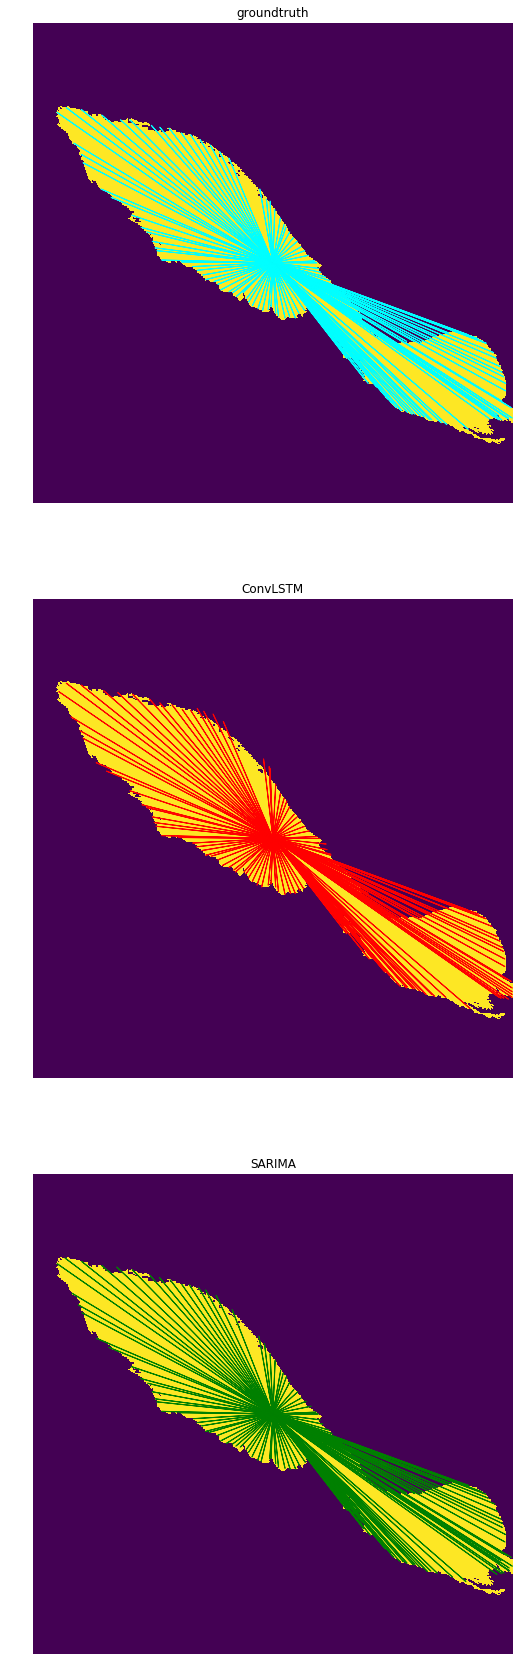

In [60]:
idx = 0
img = restore_data(test_list_filenames[idx])

fig, axes = plt.subplots(3,1, figsize=(10,30))
plot_img_and_boundary_vectors(img, data_test[idx], axes[0], 'aqua', 'groundtruth')
plot_img_and_boundary_vectors(img, convlstm_predict[idx], axes[1], 'red', 'ConvLSTM')
plot_img_and_boundary_vectors(img, yhat_fill_unique[idx], axes[2], 'green', 'SARIMA')

plt.savefig('figs/groundtruth_convlstm_sarima_{}.png'.format(idx))
plt.show()

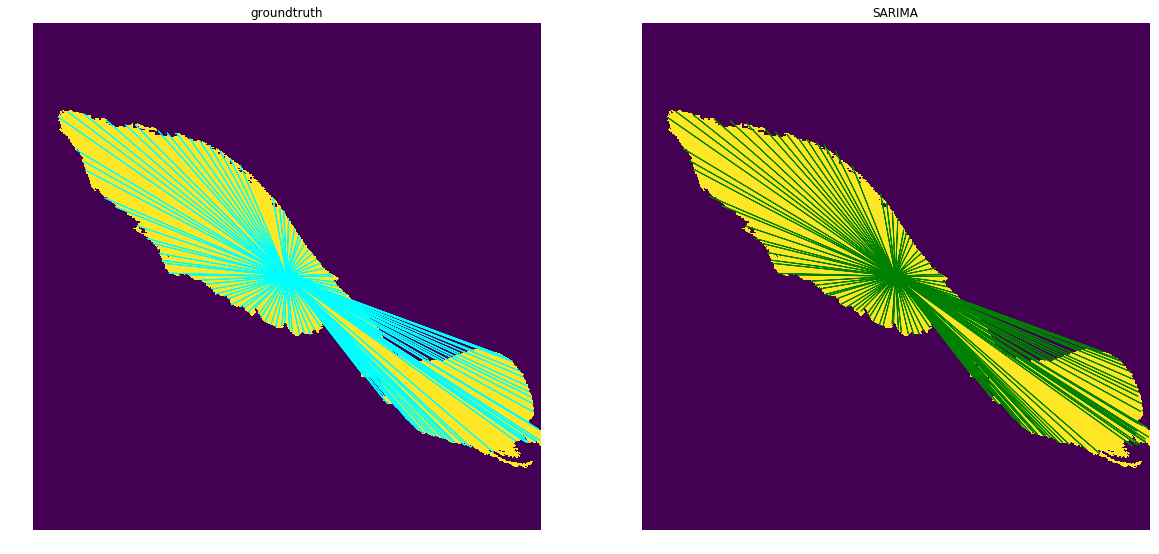

In [61]:
idx = 0
img = restore_data(test_list_filenames[idx])

fig, axes = plt.subplots(1,2, figsize=(20, 10))
plot_img_and_boundary_vectors(img, data_test[idx], axes[0], 'aqua', 'groundtruth')
plot_img_and_boundary_vectors(img, yhat_fill_unique[idx], axes[1], 'green', 'SARIMA')

plt.savefig('figs/groundtruth_sarima_{}.png'.format(idx))
plt.show()

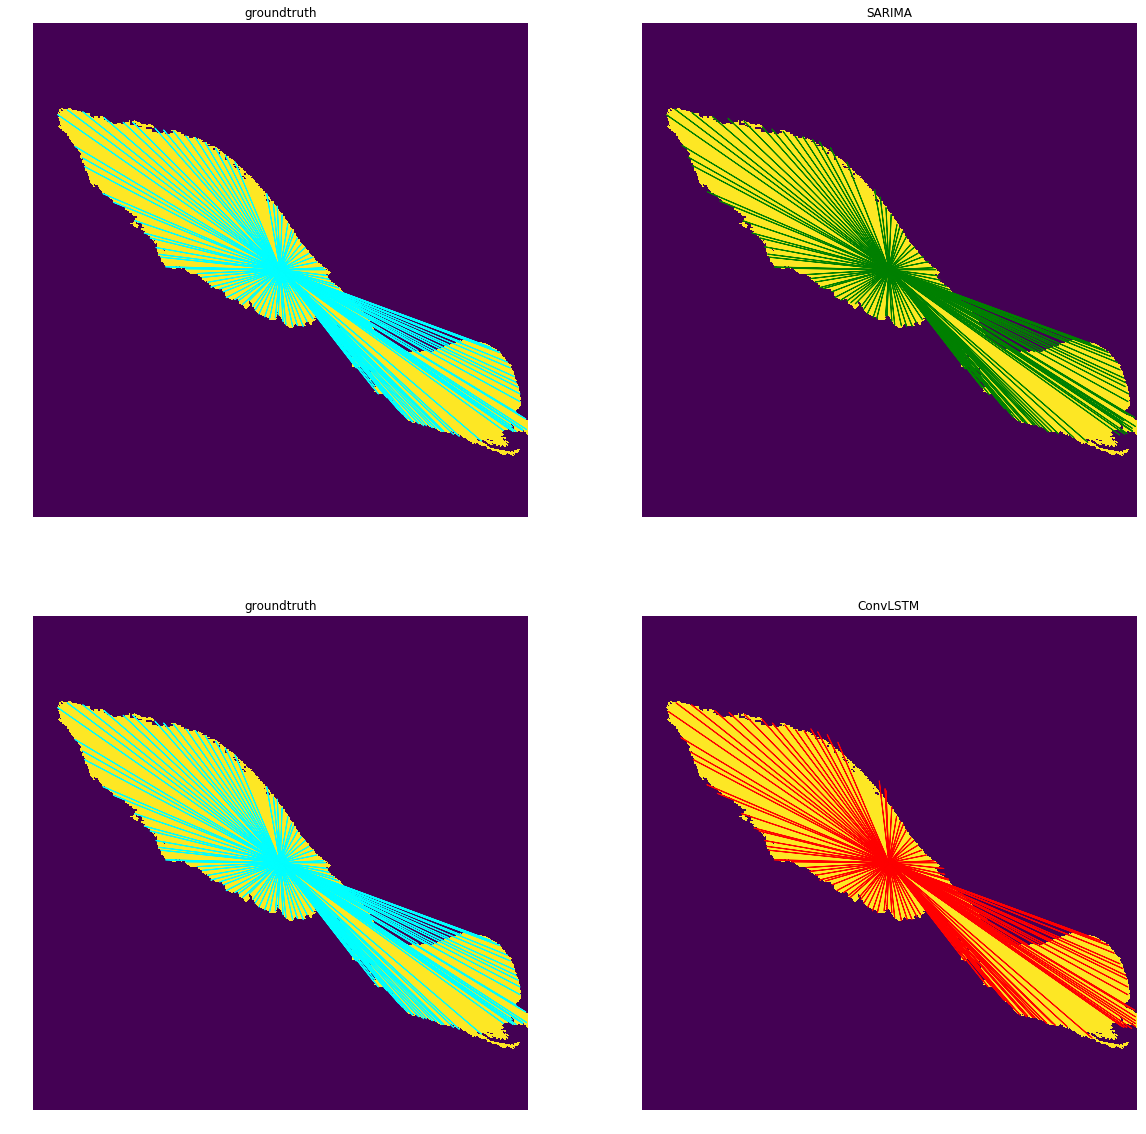

In [62]:
idx = 0
img = restore_data(test_list_filenames[idx])

fig, axes = plt.subplots(2,2, figsize=(20, 20))
plot_img_and_boundary_vectors(img, data_test[idx], axes[0][0], 'aqua', 'groundtruth')
plot_img_and_boundary_vectors(img, yhat_fill_unique[idx], axes[0][1], 'green', 'SARIMA')
plot_img_and_boundary_vectors(img, data_test[idx], axes[1][0], 'aqua', 'groundtruth')
plot_img_and_boundary_vectors(img, convlstm_predict[idx], axes[1][1], 'red', 'ConvLSTM')

plt.savefig('figs/groundtruth_sarima_{}.png'.format(idx))
plt.show()

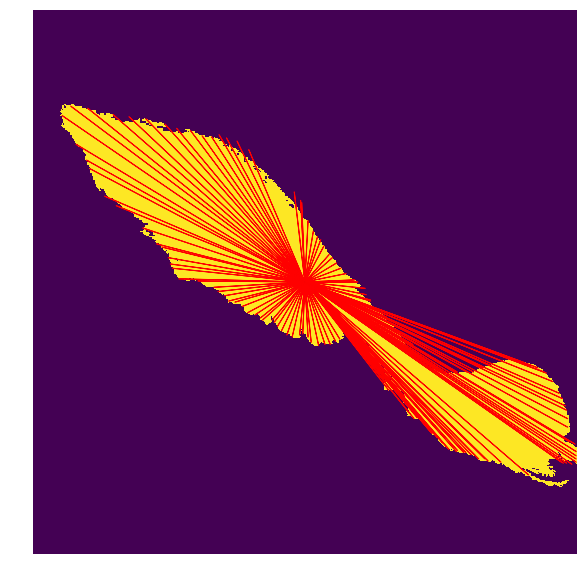

In [63]:
idx = 0
img = restore_data(test_list_filenames[idx])

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(img)
patches = []
for i, (x, y) in enumerate(convlstm_predict[idx]):
    if i % 10 != 0:
        continue
    line_string = LineString([(256, 256), (y,x)])
    p = shape(line_string)
    p = p.buffer(0.05)
    patches.append(PolygonPatch(p, ec='red', zorder=1))
p = PatchCollection(patches, match_original=True)
ax.add_collection(p)
ax.axis('off')
plt.savefig('figs/sarima_test_{}.png'.format(idx))
plt.show()

In [64]:
x = data_test[0]

In [65]:
x[:,0].min()

88

In [66]:
def find_border(data_points):
    x = data_points[:, 0]
    y = data_points[:, 1]
    return x.min(), y.min(), x.max(), y.max()

In [67]:
find_border(data_test[0])

(88, 25, 444, 512)

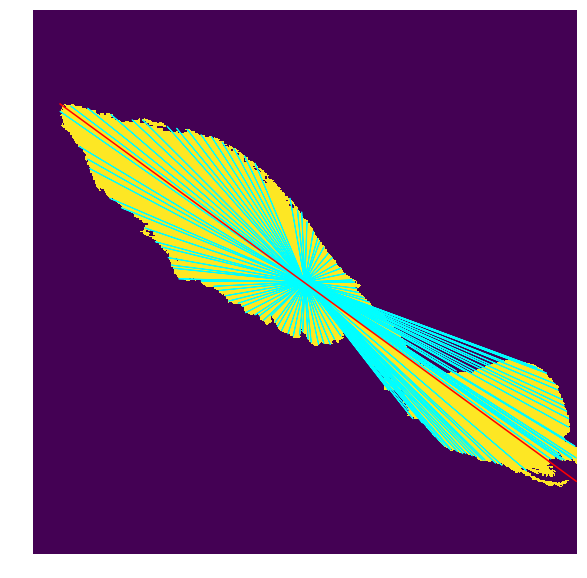

In [68]:
idx = 0
img = restore_data(test_list_filenames[idx])

xmin, ymin, xmax, ymax = find_border(data_test[idx])

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(img)
patches = []
for i, (x, y) in enumerate(data_test[idx]):
    if i % 10 != 0:
        continue
    line_string = LineString([(256, 256), (y,x)])
    p = shape(line_string)
    p = p.buffer(0.05)
    patches.append(PolygonPatch(p, ec='aqua', zorder=1))
p = PatchCollection(patches, match_original=True)
ax.add_collection(p)
ax.plot([ymin, ymax], [xmin, xmax], color='red')
ax.axis('off')
plt.savefig('figs/sarima_test_{}.png'.format(idx))
plt.show()

# Calculate polygon area

In [69]:
from shapely.geometry import MultiPolygon, Polygon

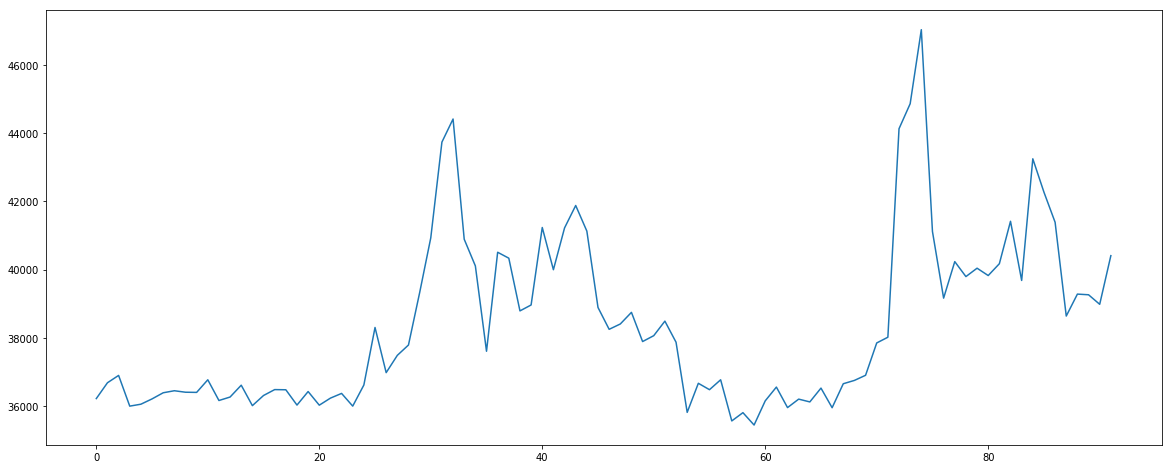

In [70]:
area_test_truth = []
for boundary_vector in data_test:
    p = Polygon(zip(boundary_vector[:, 0], boundary_vector[:, 1]))
    area_test_truth.append(p.area)
    
plt.plot(area_test_truth)

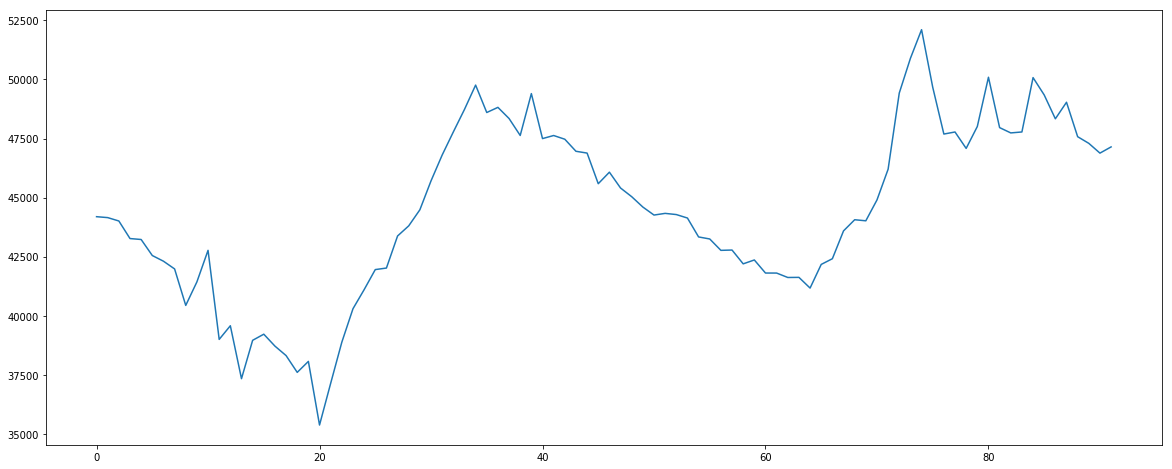

In [71]:
area_test_truth_1 = []
for filename in test_list_filenames:
    img = restore_data(filename)
    area_test_truth_1.append(np.sum(img))
plt.plot(area_test_truth_1)

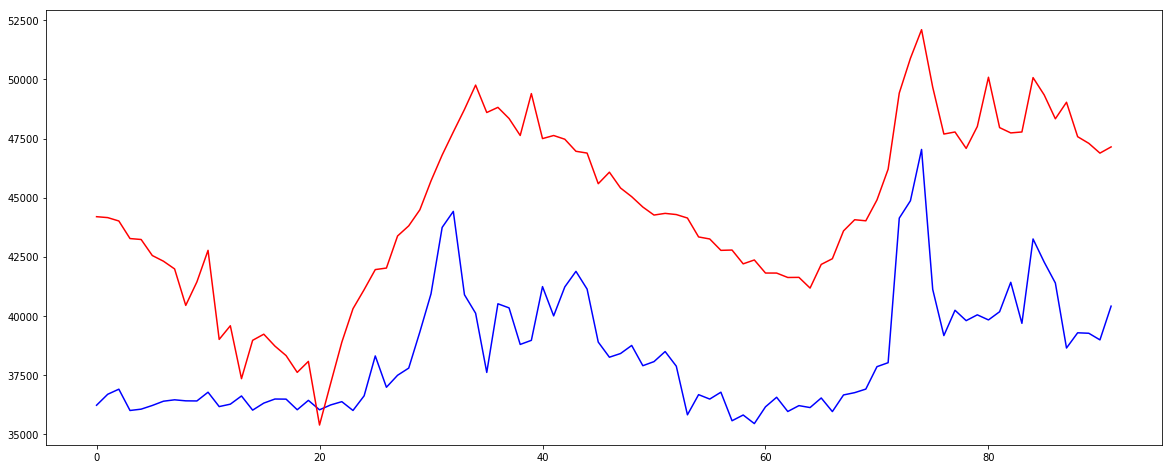

In [72]:
plt.plot(area_test_truth, color='b', label='area from boundary vectors')
plt.plot(area_test_truth_1, color='r', label='area from original image')

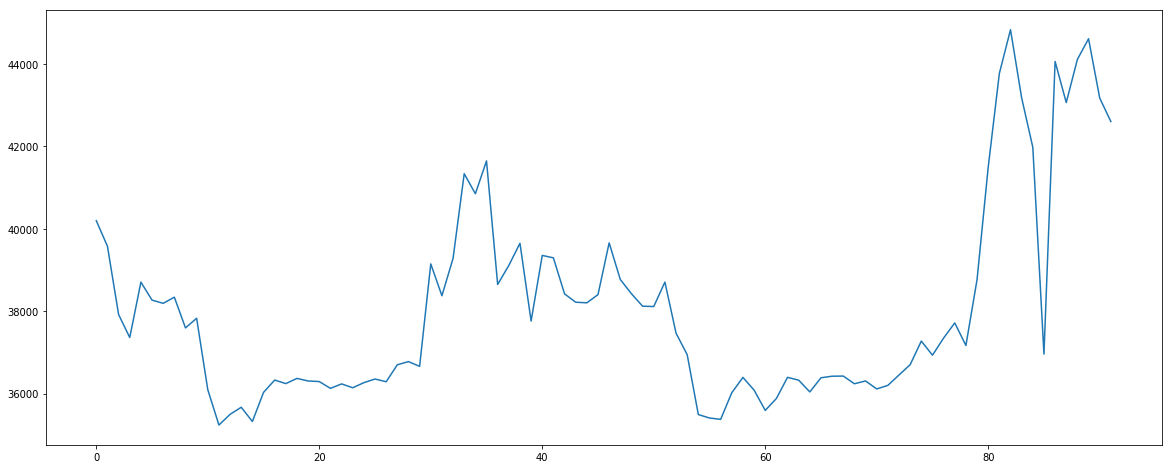

In [73]:
area_test_convlstm = []
for boundary_vector in convlstm_predict:
    p = Polygon(zip(boundary_vector[:, 0], boundary_vector[:, 1]))
    area_test_convlstm.append(p.area)
    
plt.plot(area_test_convlstm)

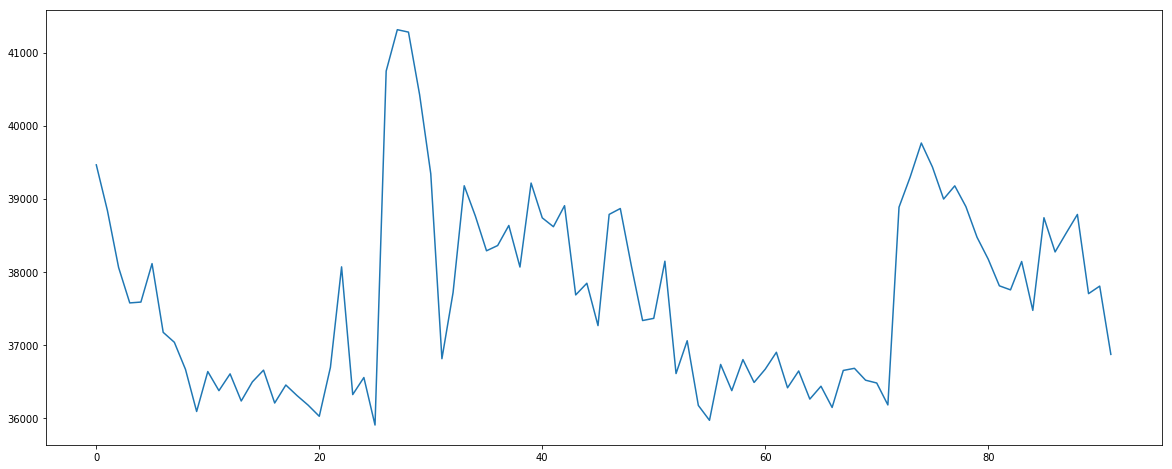

In [74]:
area_test_sarima = []
for boundary_vector in sarima_predict:
    p = Polygon(zip(boundary_vector[:, 0], boundary_vector[:, 1]))
    area_test_sarima.append(p.area)
    
plt.plot(area_test_sarima)

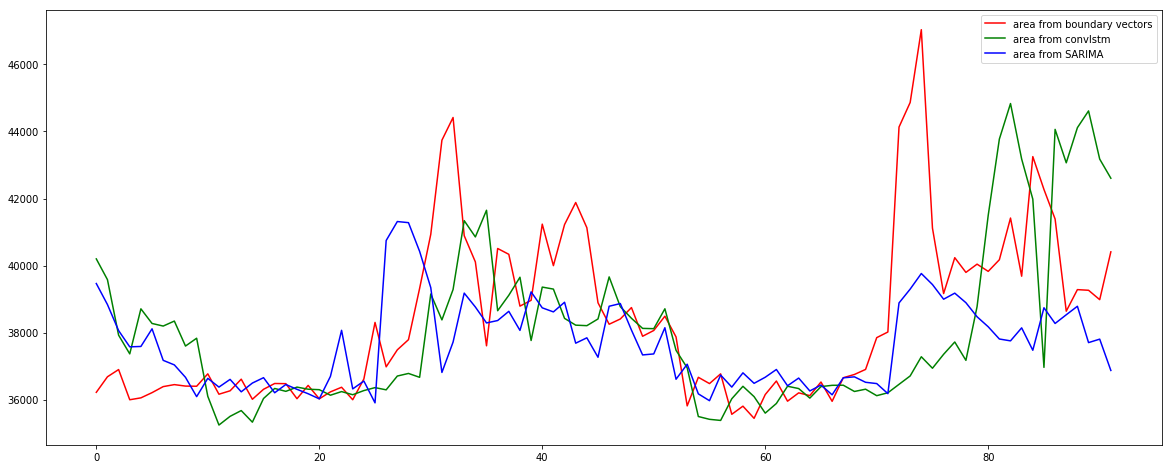

In [75]:
plt.plot(area_test_truth, color='r', label='area from boundary vectors')
plt.plot(area_test_convlstm, color='g', label='area from convlstm')
plt.plot(area_test_sarima, color='b', label='area from SARIMA')
plt.legend()

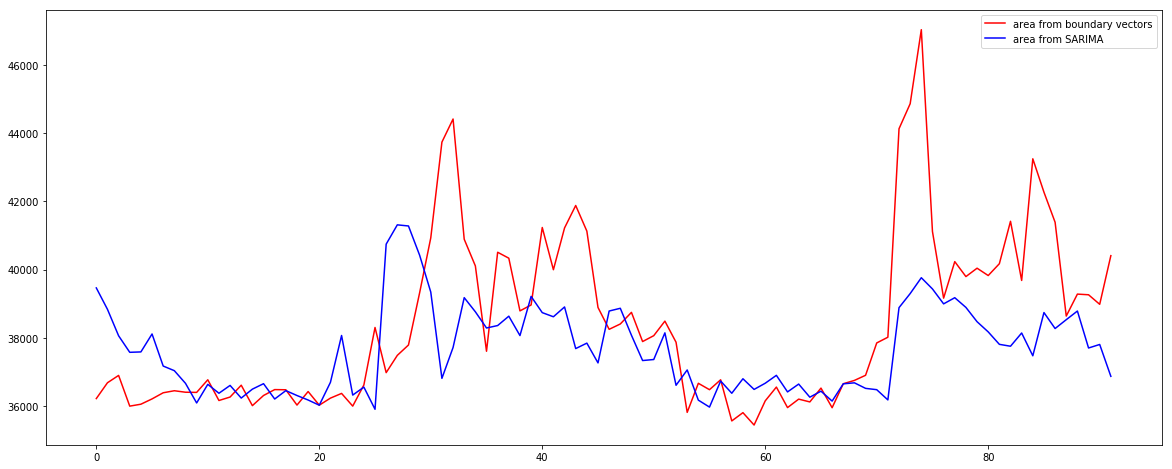

In [76]:
plt.plot(area_test_truth, color='r', label='area from boundary vectors')
plt.plot(area_test_sarima, color='b', label='area from SARIMA')
plt.legend()
plt.savefig('result/Comparision area calculated from boundary vectors of test data and boundary vectors predicted by SARIMA.png')

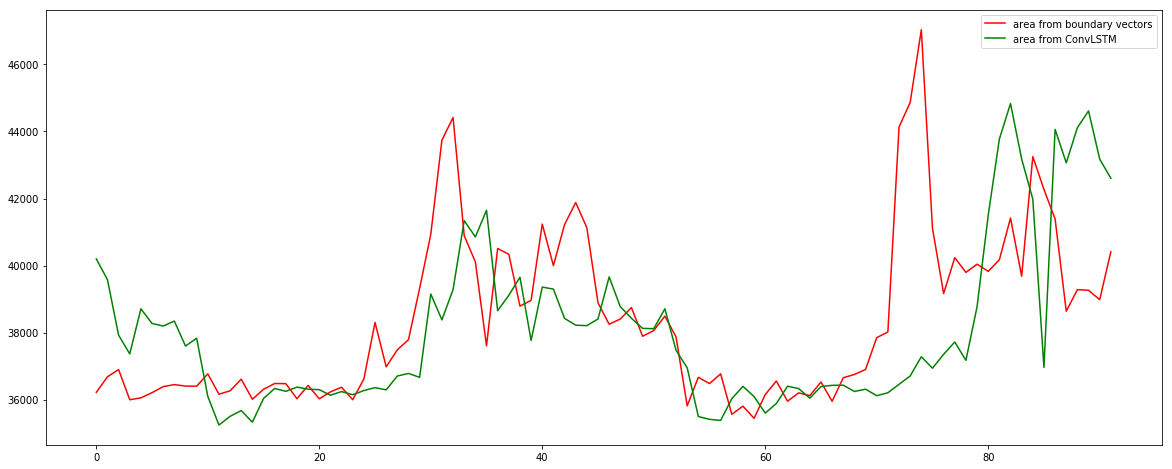

In [77]:
plt.plot(area_test_truth, color='r', label='area from boundary vectors')
plt.plot(area_test_convlstm, color='g', label='area from ConvLSTM')
plt.legend()
plt.savefig('result/Comparision area calculated from boundary vectors of test data and boundary vectors predicted by ConvLSTM.png')

In [78]:
np.corrcoef(np.asarray(area_test_truth), np.asarray(area_test_convlstm))

array([[1.        , 0.43370081],
       [0.43370081, 1.        ]])

In [79]:
np.corrcoef(np.asarray(area_test_truth), np.asarray(area_test_sarima))

array([[1.        , 0.50400094],
       [0.50400094, 1.        ]])

In [80]:
area_test_truth = np.asarray(area_test_truth)
area_test_convlstm = np.asarray(area_test_convlstm)
area_test_sarima = np.asarray(area_test_sarima)

In [81]:
diff_truth_sarima = np.abs(area_test_truth - area_test_sarima)/area_test_truth
diff_truth_convlstm = np.abs(area_test_truth - area_test_convlstm)/area_test_truth

In [82]:
area_test_truth - area_test_sarima

array([-3.24673191e+03, -2.15536135e+03, -1.16311498e+03, -1.57879616e+03,
       -1.53375010e+03, -1.90473573e+03, -7.83970719e+02, -5.88446745e+02,
       -2.60770006e+02,  3.10057427e+02,  1.33657732e+02, -2.12791347e+02,
       -3.40534001e+02,  3.77439234e+02, -4.83838542e+02, -3.46582291e+02,
        2.76216494e+02,  2.49264191e+01, -2.80192405e+02,  2.48491959e+02,
        1.04906262e+00, -4.62475912e+02, -1.69922871e+03, -3.23684864e+02,
        6.27614065e+01,  2.40009898e+03, -3.76953441e+03, -3.82871298e+03,
       -3.49203444e+03, -1.10338948e+03,  1.58976747e+03,  6.93052831e+03,
        6.70258759e+03,  1.71388008e+03,  1.34594416e+03, -6.82121511e+02,
        2.14990878e+03,  1.70132066e+03,  7.24149492e+02, -2.51590998e+02,
        2.49745464e+03,  1.38035230e+03,  2.31835436e+03,  4.19780217e+03,
        3.28626273e+03,  1.62586477e+03, -5.36639294e+02, -4.60535454e+02,
        6.71604769e+02,  5.56913632e+02,  6.99587743e+02,  3.43907995e+02,
        1.26264808e+03, -

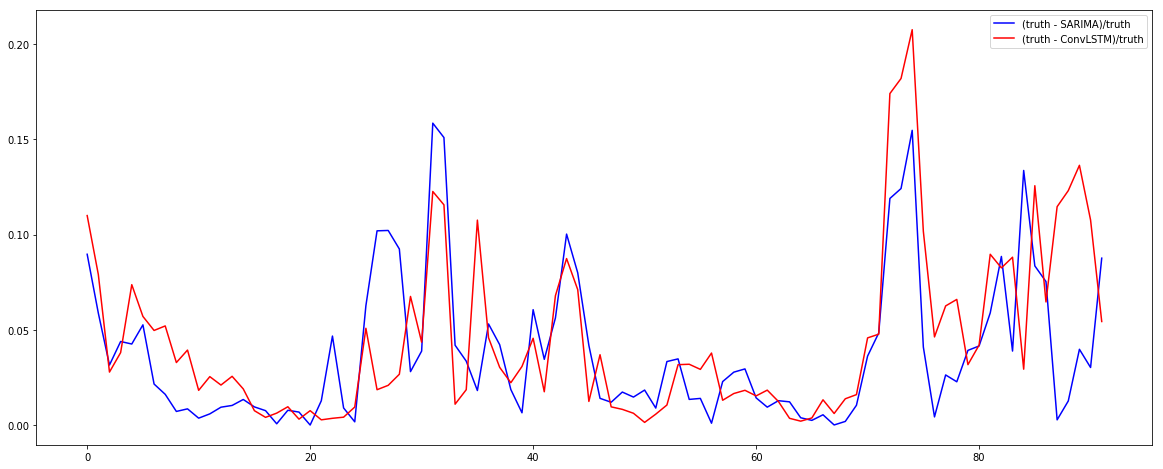

In [83]:
plt.plot(diff_truth_sarima, color='b', label='(truth - SARIMA)/truth')
plt.plot(diff_truth_convlstm, color='r', label='(truth - ConvLSTM)/truth')
plt.legend()
plt.savefig('result/Difference of area truth and area predicted by SARIMA-ConvLSTM.png')

In [84]:
np.mean(diff_truth_sarima), np.mean(diff_truth_convlstm)

(0.037871599888377676, 0.045060134762438545)

# Testing sensity of sample points

In [85]:
log = pd.read_csv('log.csv')

In [86]:
log

,timestamps,point_id,train_loss,test_loss
0,23.392s,0,2.785,5.577
1,26.059s,424,1.306,1.618
2,26.104s,2326,10.487,6.766
3,26.791s,1271,18.392,18.621
4,31.205s,1904,2.630,1.916
5,31.630s,1693,0.349,0.268
6,36.234s,2748,0.213,0.191
7,36.631s,2537,0.741,0.455
8,38.665s,2115,43.789,27.141
9,41.621s,636,2.738,3.346


In [87]:
a = log[log['train_loss'] > 10]

In [88]:
b = a.sort_values('train_loss', ascending=False)
b

,timestamps,point_id,train_loss,test_loss
2865,9960.880s,208,1.032317e+09,inf
224,796.434s,226,1.863320e+02,116.838
1199,4187.820s,296,1.412790e+02,73.823
1264,4406.285s,510,1.376290e+02,119.618
1542,5349.646s,1572,1.307070e+02,158.343
2894,10073.933s,416,1.298210e+02,74.949
733,2544.647s,1110,1.288710e+02,152.475
1918,6637.622s,346,1.243610e+02,46.086
1616,5603.447s,530,1.236470e+02,40.894
1588,5503.219s,960,1.176710e+02,3.364


In [89]:
def find_point_sensitive(log, threshold, loss_type='train'):
    loss_type = loss_type + "_loss"
    a = log[log[loss_type] > threshold]
    return a.sort_values(loss_type, ascending=False)

In [90]:
train_loss_greater_than_100 = find_point_sensitive(log, 100, 'train')
train_loss_greater_than_100

,timestamps,point_id,train_loss,test_loss
2865,9960.880s,208,1.032317e+09,inf
224,796.434s,226,1.863320e+02,116.838
1199,4187.820s,296,1.412790e+02,73.823
1264,4406.285s,510,1.376290e+02,119.618
1542,5349.646s,1572,1.307070e+02,158.343
2894,10073.933s,416,1.298210e+02,74.949
733,2544.647s,1110,1.288710e+02,152.475
1918,6637.622s,346,1.243610e+02,46.086
1616,5603.447s,530,1.236470e+02,40.894
1588,5503.219s,960,1.176710e+02,3.364


In [91]:
data_train_1 = data_train.reshape(data_train.shape[0], -1)
data_test_1 = data_test.reshape(data_test.shape[0], -1)
data_train_1.shape, data_test_1.shape

((598, 2968), (92, 2968))

In [92]:
def plot_point(data, point_id, save_path=None):
    if not hasattr(point_id, '__len__'):
        point_id = [point_id]
    colors = ['r', 'g', 'b']
    n = len(point_id)
    fig, axes = plt.subplots(n, 1, figsize=(15, 5*n))
    if not hasattr(axes, '__len__'):
        axes = [axes]
    for i, id in enumerate(point_id):
        data_id = data[:, id]
        ax = axes[i]
        ax.plot(data_id, color=colors[i%3])
        ax.set_ylabel('coordinate value')
        ax.set_xlabel('timestep')
        ax.set_title('point_{}'.format(id))
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()

In [93]:
point_id = train_loss_greater_than_100['point_id'].values

In [94]:
point_id

array([ 208,  226,  296,  510, 1572,  416, 1110,  346,  530,  960, 1228,
        961,  200,  552, 1111, 2137,  314])

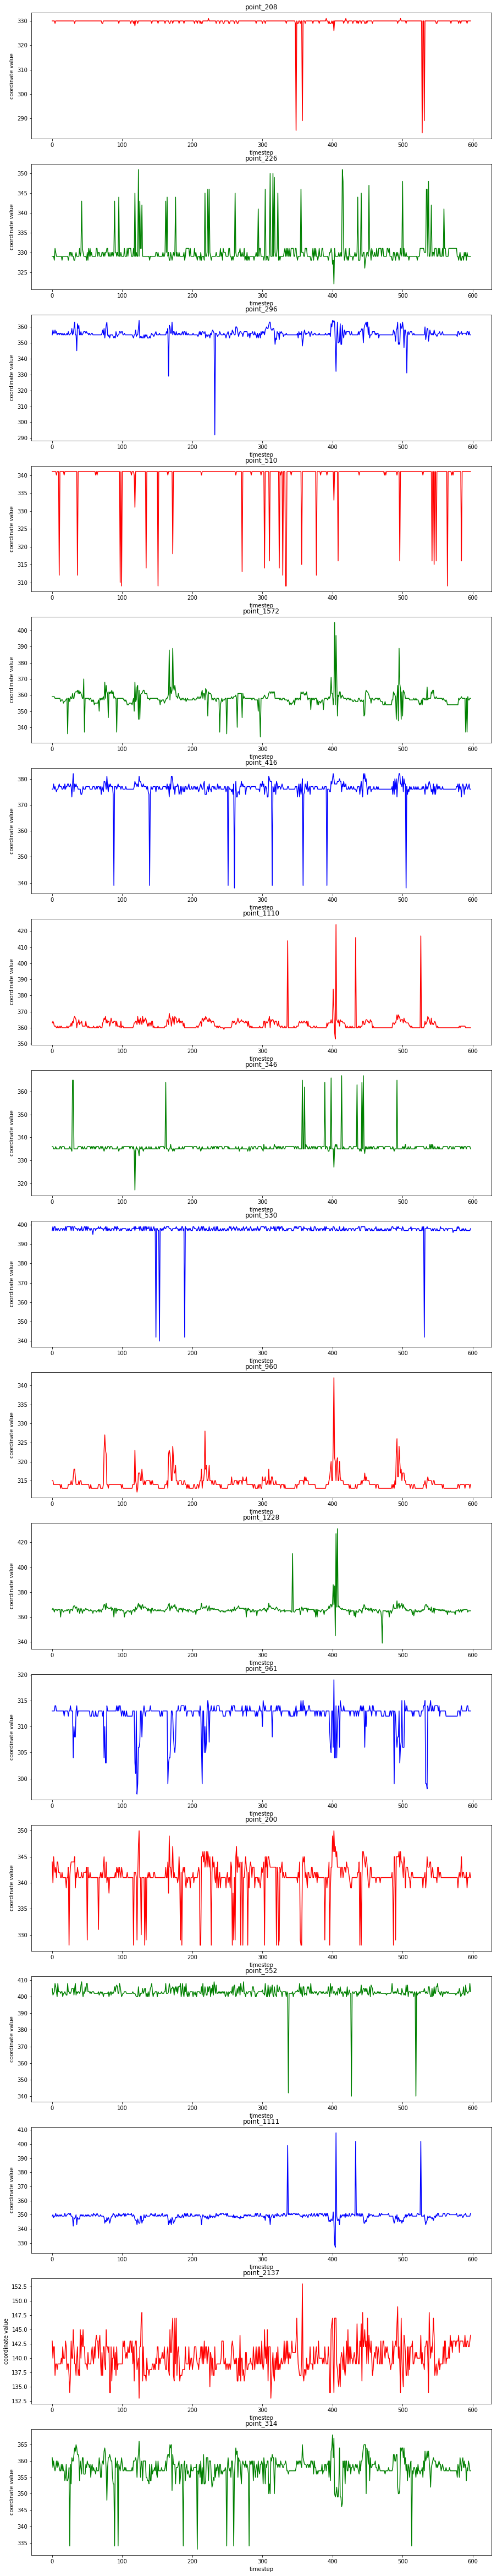

In [95]:
plot_point(data_train_1, point_id, 'result/train_loss_greater_100.png')

In [96]:
def plot_img_and_sensitive_points(list_filenames, img_id, data, sensitive_point_id,
                                  ax=None, color='aqua', title=None, save_path=None, show=True):
    img = restore_data(list_filenames[img_id])
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=(15,8))
    ax.imshow(img)
    patches = []
    data = data[img_id]
    if not hasattr(sensitive_point_id, '__len__'):
        sensitive_point_id = [sensitive_point_id]
    for id in sensitive_point_id:
        x = data[id, 0]
        y = data[id, 1]
        line_string = LineString([(256, 256), (y,x)])
        p = shape(line_string)
        p = p.buffer(0.05)
        patches.append(PolygonPatch(p, ec=color, zorder=1))
    p = PatchCollection(patches, match_original=True)
    ax.add_collection(p)
    if title is not None:
        ax.set_title(title)
    if save_path is not None:
        plt.savefig(save_path)
    ax.axis('off')
    if show:
        plt.show()

In [97]:
train_list_filenames = [os.path.join(data_dir, str(year), '{}{:03}'.format(year, day), 'masked.dat')
                        for year in train_years for day in range(1,366, day_period)]

test_list_filenames = [os.path.join(data_dir, str(year), '{}{:03}'.format(year, day), 'masked.dat')
                       for year in test_years for day in range(1,366, day_period)]

In [98]:
sensitive_point_visualize_path = 'result/sensitive_point'
if not os.path.exists(sensitive_point_visualize_path):
    os.makedirs(sensitive_point_visualize_path)

In [99]:
sensitive_point_id_set = set()
for id in point_id:
    sensitive_point_id_set.add(id//2)

In [100]:
sensitive_point_id_set

{100, 104, 113, 148, 157, 173, 208, 255, 265, 276, 480, 555, 614, 786, 1068}

In [101]:
'''
for id in sensitive_point_id_set:
    cur_dir = os.path.join(sensitive_point_visualize_path, str(id))
    if not os.path.exists(cur_dir):
        os.makedirs(cur_dir)
    for i, filenames in enumerate(train_list_filenam`es):
        plot_img_and_sensitive_points(train_list_filenames, i, data_train, id, 
                                      title='timesteps_{}-point_{}'.format(i, id), show=True,
                                      save_path=os.path.join(cur_dir, '{}-{}.png'.format(i, id)))
'''

"\nfor id in sensitive_point_id_set:\n    cur_dir = os.path.join(sensitive_point_visualize_path, str(id))\n    if not os.path.exists(cur_dir):\n        os.makedirs(cur_dir)\n    for i, filenames in enumerate(train_list_filenam`es):\n        plot_img_and_sensitive_points(train_list_filenames, i, data_train, id, \n                                      title='timesteps_{}-point_{}'.format(i, id), show=True,\n                                      save_path=os.path.join(cur_dir, '{}-{}.png'.format(i, id)))\n"

In [102]:
sensitive_point_id_list = []
for id in point_id:
    sensitive_point_id_list.append(id//2)
sensitive_point_id_list

[104,
 113,
 148,
 255,
 786,
 208,
 555,
 173,
 265,
 480,
 614,
 480,
 100,
 276,
 555,
 1068,
 157]

In [103]:
df_train.shape

(506, 2959)

In [104]:
np.argmin(df_train[208].values[:400])

348

In [105]:
np.unique(df_train[208].values)

array([284, 285, 289, 328, 329, 330, 331])

In [106]:
np.unique(df_train[226].values[:100])

array([328, 329, 330, 331, 343, 344])

In [107]:
len(np.where(df_train[226].values > 335)[0]) / len(df_train[226].values)

0.06126482213438735

In [108]:
np.where(df_train[226].values > 335)

(array([ 42,  89,  95, 118, 123, 125, 128, 162, 164, 176, 218, 222, 224,
        261, 294, 304, 311, 315, 317, 322, 355, 368, 369, 390, 395, 406,
        442, 443, 445, 449, 467]),)

In [109]:
len(np.where(df_train[510].values <= 331)[0]) /506

0.041501976284584984

In [110]:
x = df_train[208].values.copy()

In [111]:
y = np.unique(x, return_counts=True)

In [112]:
y

(array([284, 285, 289, 328, 329, 330, 331]),
 array([  1,   1,   2,   1,  55, 444,   2]))

In [113]:
def find_most_frequence_range(data, threshold):
    values, counts = np.unique(data, return_counts=True)
    most_frequence_values = []
    for value, count in zip(values, counts):
        if count >= threshold:
            most_frequence_values.append(value)
    return np.asarray(most_frequence_values)

In [114]:
def remove_outliers(data, threshold=15):
    data1 = data.copy()
    most_frequence_range = find_most_frequence_range(data1, threshold)
    default_value = np.mean(most_frequence_range)
    data1[(data1 < most_frequence_range[0]) | (data1 > most_frequence_range[-1])] = default_value
    return data1

In [115]:
import statsmodels.api as sm

In [116]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [152]:
x_train = df_train.iloc[:,226].values
x_test = df_test.iloc[:,226].values

In [156]:
x_train_1 = remove_outliers(x_train)
x_test_1 = remove_outliers(x_test)

In [154]:
mod = sm.tsa.statespace.SARIMAX(x_train,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 0, 46),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
pred = results.forecast(92)
print(mse(pred, x_test))

116.83810321450254


In [183]:
mod = sm.tsa.statespace.SARIMAX(x_train_1,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 0, 46),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
pred = results.forecast(92)
print(mse(pred, x_test_1))

5.124887387534093


In [180]:
def remove_outliers_test(data_train, data_test, threshold=15):
    data1 = data_test.copy()
    most_frequence_range = find_most_frequence_range(data_train, threshold)
    default_value = np.mean(most_frequence_range)
    data1[(data1 < most_frequence_range[0]) | (data1 > most_frequence_range[-1])] = default_value
    return data1

In [171]:
x_train.shape, x_test.shape

((506,), (92,))

In [181]:
x_test_1 = remove_outliers_test(x_train, x_test)

In [182]:
x_test_1

array([447, 446, 446, 446, 447, 442, 447, 447, 447, 447, 447, 442, 447,
       446, 446, 446, 446, 446, 446, 446, 446, 446, 446, 446, 446, 447,
       447, 443, 441, 447, 447, 446, 442, 446, 446, 443, 447, 446, 446,
       443, 443, 443, 447, 446, 442, 447, 447, 446, 446, 447, 447, 446,
       447, 446, 446, 447, 447, 447, 445, 443, 443, 446, 446, 446, 446,
       443, 446, 443, 446, 447, 446, 446, 446, 447, 443, 445, 442, 443,
       442, 443, 441, 441, 443, 443, 446, 446, 447, 446, 441, 446, 447,
       446])

In [185]:
idx = 208
x_train = df_train.iloc[:,idx].values
x_test = df_test.iloc[:,idx].values

x_train_1 = remove_outliers(x_train)
x_test_1 = remove_outliers(x_test)

mod = sm.tsa.statespace.SARIMAX(x_train,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 0, 46),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
pred = results.forecast(92)
print(mse(pred, x_test))

inf


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  


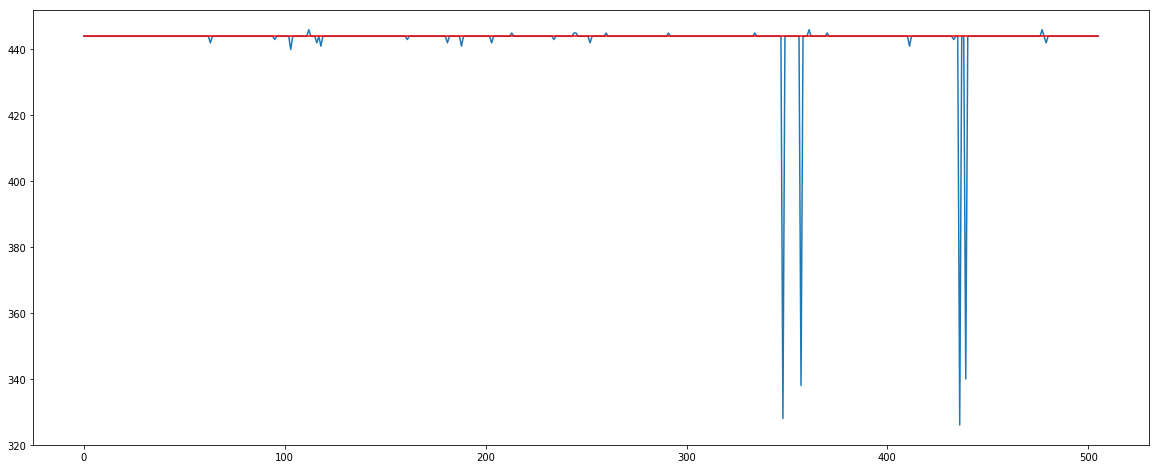

In [188]:
plt.plot(x_train)
plt.plot(x_train_1, color='r')

In [186]:
idx = 208
x_train = df_train.iloc[:,idx].values
x_test = df_test.iloc[:,idx].values

x_train_1 = remove_outliers(x_train)
x_test_1 = remove_outliers(x_test)

mod = sm.tsa.statespace.SARIMAX(x_train_1,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 0, 46),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
pred = results.forecast(92)
print(mse(pred, x_test_1))

LinAlgError: Non-positive-definite forecast error covariance matrix encountered at period 47

In [131]:
gcloud_result = restore_data('gcloud/226.dat')

In [132]:
gcloud_model = gcloud_result[1]

In [133]:
pred_gcloud = gcloud_model.forecast(92)
print(mse(pred_gcloud, df_test[226]))

13698.612681784765


In [144]:
a = results.get_prediction(start=150)
a = a.predicted_mean
b = df_train.iloc[:,226].values[150:]
print(mse(a,b))

13998.047077145904


In [141]:
a1 = gcloud_model.get_prediction(start=150)
a1 = a1.predicted_mean
b = df_train[226][150:]
print(mse(a1,b))

13991.609408417575


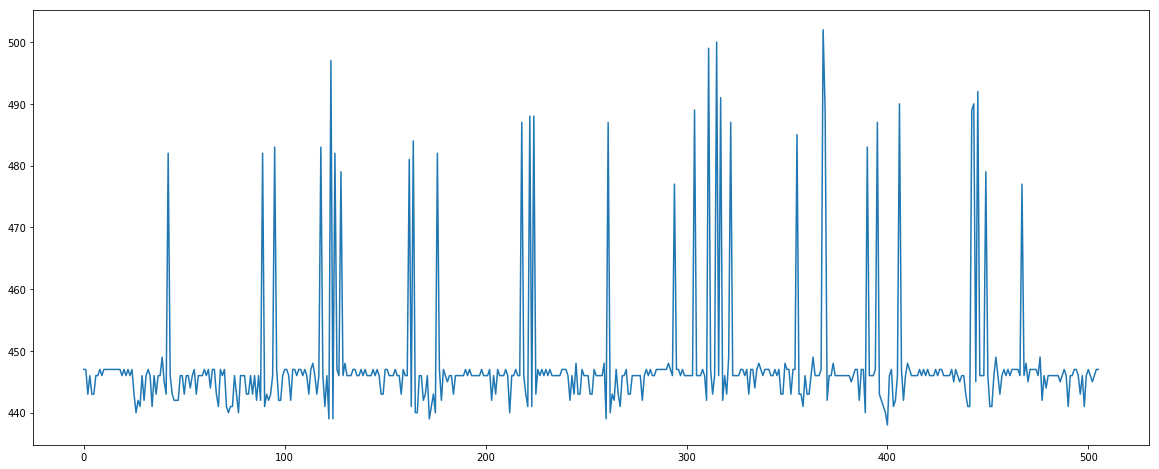

In [145]:
b = df_train.iloc[:, 226].values
plt.plot(b)

In [150]:
df_train[227]

0      447
1      447
2      443
3      446
4      443
5      443
6      446
7      446
8      447
9      446
10     447
11     447
12     447
13     447
14     447
15     447
16     447
17     447
18     447
19     446
20     447
21     446
22     447
23     446
24     447
25     443
26     440
27     442
28     441
29     446
      ... 
476    449
477    442
478    446
479    444
480    446
481    446
482    446
483    446
484    446
485    446
486    445
487    446
488    447
489    446
490    441
491    446
492    446
493    447
494    447
495    446
496    443
497    446
498    441
499    446
500    447
501    446
502    445
503    446
504    447
505    447
Name: 227, Length: 506, dtype: int64

In [147]:
df_train

,1,2,3,4,5,6,7,8,9,10,...,2958,2959,2960,2961,2962,2963,2964,2965,2966,2967
0,306,257,306,257,307,258,307,258,310,259,...,252,303,254,304,254,305,255,305,255,306
1,306,257,306,257,308,258,307,258,310,259,...,251,298,254,301,254,303,255,303,255,306
2,303,257,306,257,307,258,307,258,309,259,...,250,296,254,300,254,302,255,301,255,306
3,302,257,306,257,307,258,306,258,307,259,...,250,296,254,300,254,303,255,301,255,306
4,302,257,305,257,306,258,306,258,307,259,...,250,296,254,300,254,303,255,301,255,306
5,302,257,306,257,307,258,306,258,307,259,...,253,298,254,299,254,304,255,301,255,306
6,303,257,304,257,306,258,305,258,306,259,...,252,304,254,304,254,305,255,303,255,306
7,302,257,303,257,305,258,305,258,306,259,...,252,297,254,300,254,301,255,301,255,304
8,301,257,305,257,306,258,305,258,307,259,...,250,296,254,300,254,303,255,300,255,307
9,302,257,304,257,307,258,306,258,307,259,...,252,297,254,300,254,303,255,301,255,306


In [149]:
df_train.columns[256]

257